## Concrete Strength Prediction

### Data Description:  
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).  

### Domain:

Cement manufacturing  

### Context:
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.  




### Objective:  

Modeling of strength of high performance concrete using Machine Learning

## Steps:

## 1. Data pre-processing

### a. Import Libraries

In [499]:
# importing the necessary libraries.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### b. Import and Review the data

In [500]:
# import the data

cData = pd.read_csv("concrete.csv")

cData.shape

(1030, 9)

In [501]:
cData.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


### Attribute Information:   

* Cement : measured in kg in a m3 mixture  
* Blast : measured in kg in a m3 mixture  
* Fly ash : measured in kg in a m3 mixture  
* Water : measured in kg in a m3 mixture  
* Superplasticizer : measured in kg in a m3 mixture  
* Coarse Aggregate : measured in kg in a m3 mixture  
* Fine Aggregate : measured in kg in a m3 mixture  
* Age : day (1~365)  
* Concrete compressive strength measured in MPa  

In [502]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [503]:
cData.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [504]:
df = pd.DataFrame()
for col in cData.columns:
    col_median = cData[col].median()
    col_range = cData[col].max() - cData[col].min()
    temp_df = pd.DataFrame({'Attribute':col, 'Median':[col_median] , 'Range':[col_range]})
    temp_df.set_index('Attribute', inplace=True)
    df = pd.concat([df, temp_df])
    
df

,Median,Range
Attribute,,
cement,272.900,438.00
slag,22.000,359.40
ash,0.000,200.10
water,185.000,125.20
superplastic,6.400,32.20
coarseagg,968.000,344.00
fineagg,779.500,398.60
age,28.000,364.00
strength,34.445,80.27


### Deductions:
1. The data has 9 columns. 8 independant attributes, and a target attribute "strength"
2. All independant attributes are numeric. Age is of int type and all other attributes are float type.
3. There are 1030 data points in total.
4. Notice non null values are present in the data.
5. Notice, for all of the attributes excpet "ash" and "slag" mean appox equals the 50  percentile, indicating symmetrical distrubution.
6. slag and ash  appear to be highly left skewed.
7. Some of the attributes like age, superplastic appear to significant no.of outliers as max is far greater than the 75%. 

### c. checking for missing values

In [505]:
#cData.head(10)

print("Missing values if any (True/False)? :", cData.isnull().values.any())
cData.isna().apply(pd.value_counts).T

Missing values if any (True/False)? : False


,False
cement,1030
slag,1030
ash,1030
water,1030
superplastic,1030
coarseagg,1030
fineagg,1030
age,1030
strength,1030


#### This confirms that  data has no missing values..

### d. Checking for outliers.

In [506]:
# we define outliers by using Inter Quantile range. 
# Data_point > (Q3 * 1.5)  or Data_point < (Q1 * 1.5) is said to be outlier where Q1, Q3 is 25%, 75% Quantile !

# finding the IQR for each of the columns
def check_outliers():
    cData_num = cData.loc[:,cData.columns != 'strength']
    Q1 = cData_num.quantile(0.25)
    Q3 = cData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    cData_num_mod = ((cData_num < (Q1 - 1.5 * IQR)) |(cData_num > (Q3 + 1.5 * IQR)))
    #print(cData_num_mod.head())
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in cData_num_mod:
        if(1 in cData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, cData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers()

No. of outliers in slag: 2
No. of outliers in water: 9
No. of outliers in superplastic: 10
No. of outliers in fineagg: 5
No. of outliers in age: 59


No of attributes with outliers are : 5


#### Deductions:  

* We notice there a 5 attributes which have outliers.  
* Also,the no.of outliers except for "age" are very low(< 10) w.r.t the total datapoints (1030).  
* we will replace them with the mean of the respective attributes.  

### 2. Univariate Analysis

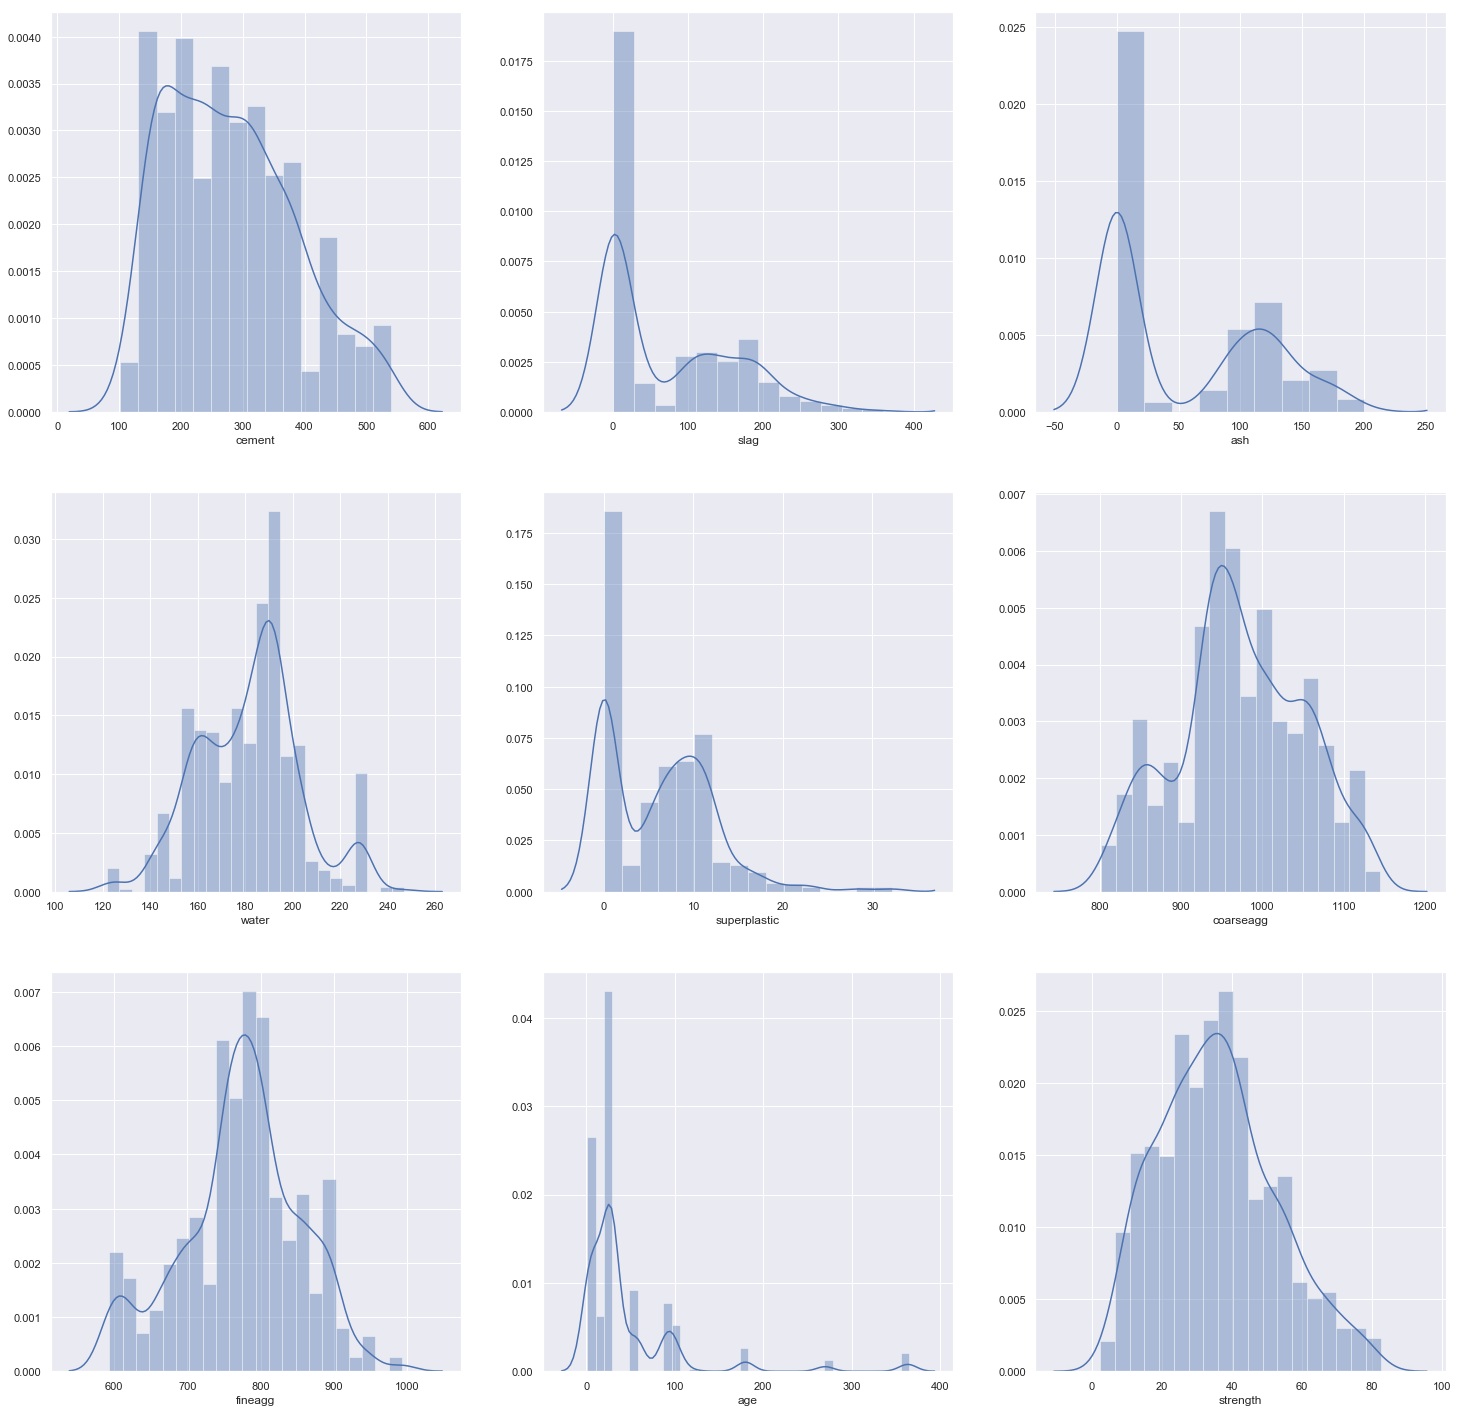

In [507]:
# we will start with understanding the distrubtion of each attributes using distplot.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))
for i, column in enumerate(cData.columns[:]):
    sns.distplot(cData[column],ax=axes[i//3,i%3])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFB2030E10>,
      dtype=object)

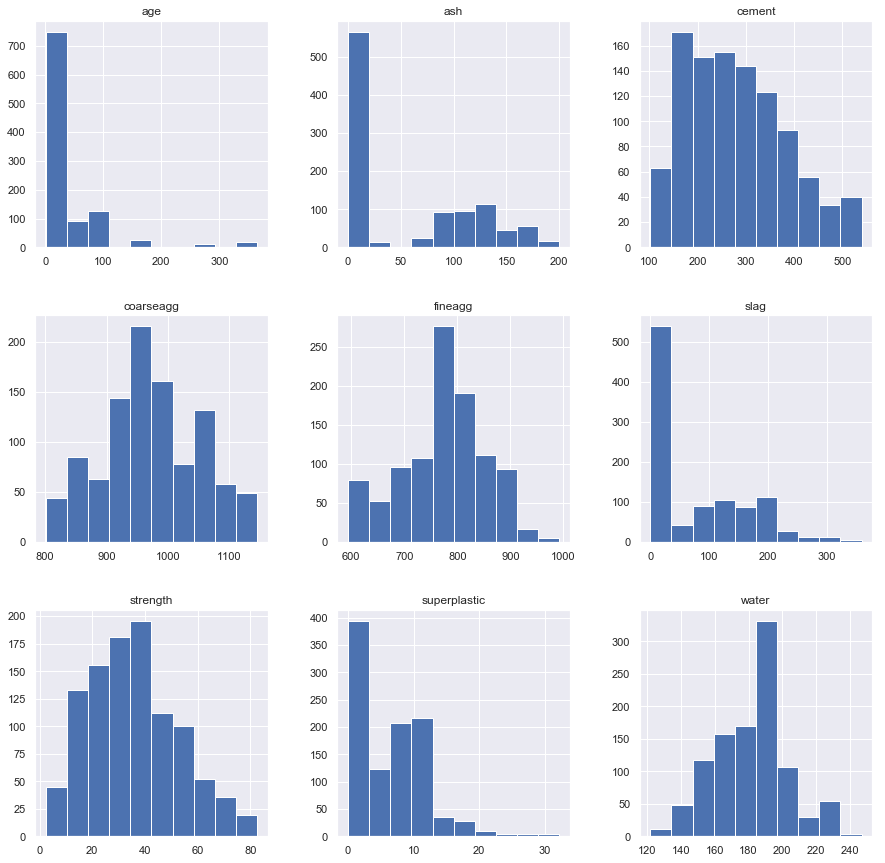

In [508]:
# Finally lets look at histograms 
# Histogram 
cData.hist(figsize=(15,15))

#### Deductions: 

* cement looks almost normally distrubuted.
* slag has three peaks(gaussians) and slightly skewed with a short right tail indicating possible outliers.
* ash has two peaks(gaussians)
* water has three peaks(guassians) and slighly skewed with short tails indication of presence of outliers.
* superplastic has two peaks(gaussians), skewed to left with a long right tail indication of presence of outliers.
* coarseagg has three peaks(guassians) and almost normal.
* fineagg has almost two peaks(guassians) and looks normally distrubuted.
* age has multiple peaks(guassians) and left skewed with a long right tail indication of presence of outliers.

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

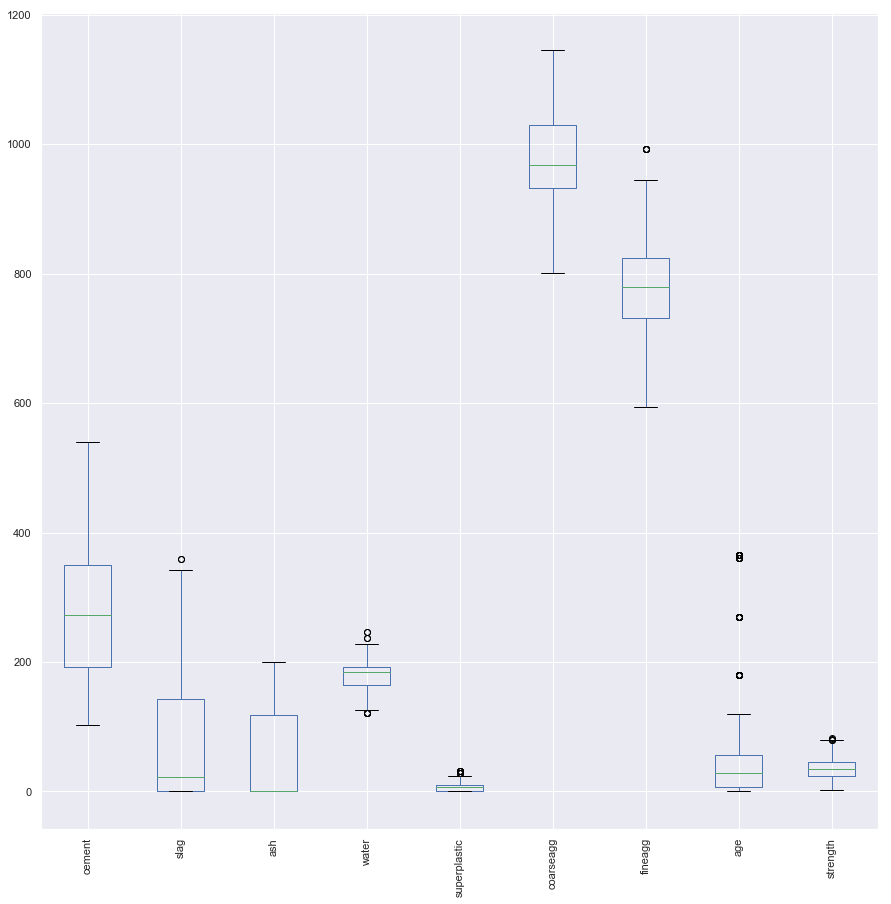

In [509]:
plt.figure(figsize= (15,15))
cData.boxplot()
plt.xticks(rotation = 90)

**This confirms the deductions made earlier as we can see outlier for 'slag', 'water', 'superplastic', 'fineagg' and 'age'.**  
**Also, different attributes are on different scales, hence we should scale the data before modelling** 

### 3. Multivariate Analysis

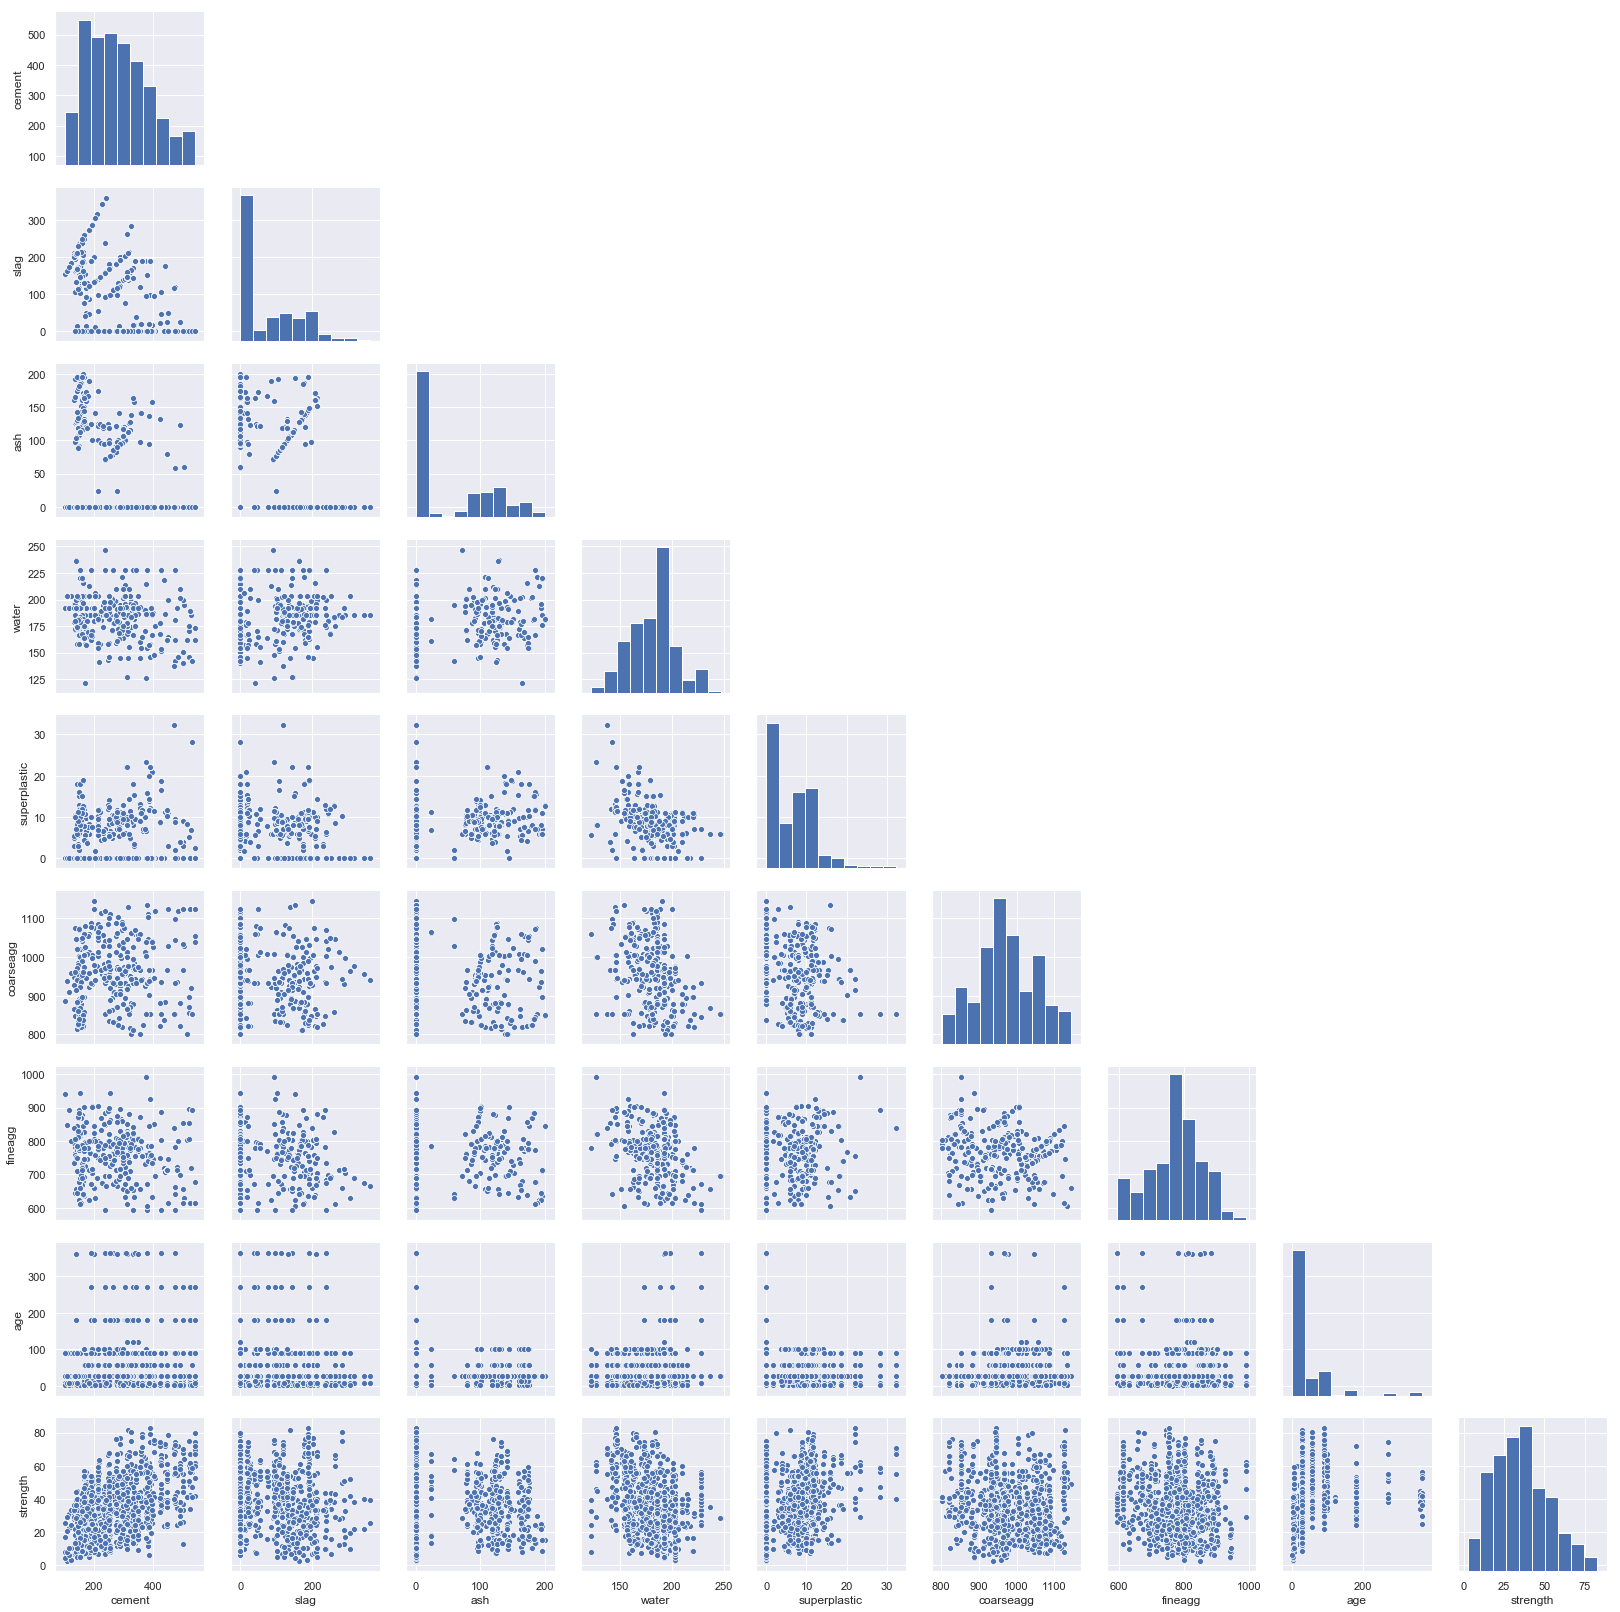

In [510]:
g = sns.pairplot(cData)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

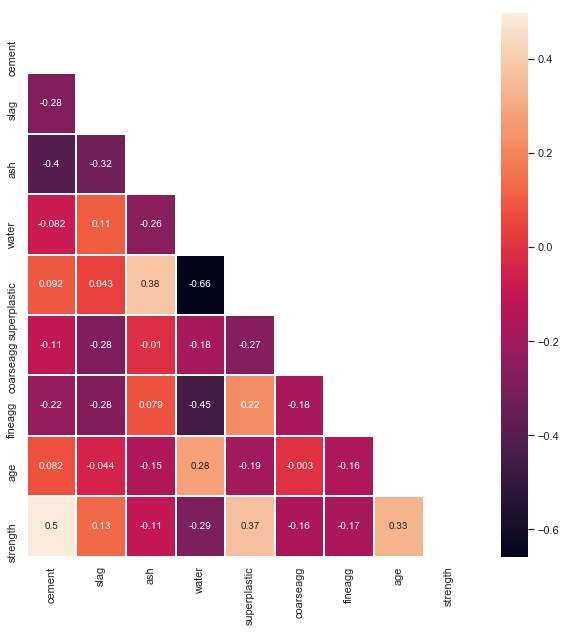

In [511]:
# Heatmap
#Correlation Matrix
corr = cData.corr() # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (10,10))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, annot= True, xticklabels = corr.index,yticklabels = corr.columns,linewidths= 1,mask = mask)   # Da Heatmap
plt.xticks(rotation = 90)   # Aesthetic purposes
plt.show()

#### Deductions:

* cement does not show any form of relationship with other independant attributes.
* slag does not show any form of relationship with other independant attributes.
* ash also deos not exhibit any form of relationship with other independant attributes.
* water shows a negative relationship with fineagg and superplastic. No form of relationship is evident for other attributes.
* superplastic also has not form of relationship with other attributes except a negative linear relationship with water as noted above.
* courseagg does not show any form of relationship with other independant attributes.
* fineagg does not show any form of relationship with other independant attributes except a negative linear relationship with water as notes above.
* age doesnot have any significant relationship with other independant attributes. 

**Based on the above deductions so far, most of the attributes doesnot have any relationship. Only water - superplastic  and water - fineagg display significant linear relationship. So we may want to combine these 3 attributes into a composite feature**

##### Relationship with target attribute.

* Only cement has some form of positive linear relationship with Strength. But given the density of cloud, it might still not be a very good predictor of strength.
* All other attributes does not display any form of relationship/trend with the target attribute : strength

**Hence a simple linear model might not be a good predictor of strength. We will further analyse to decide on model complexity.**

### 4. Handling missing values and outliers

***Now that we have completed our Exploratory data analysis, we will prepare the data for modelling.***
* Earlier, we noticed the data has no missing values but has outliers.
* So we will replace these outliers with mean values of the respective attributes.


In [512]:
# to replace with median we will loop through each column in the dataframe

for col in cData.columns[:-1]:
    Q1 = cData[col].quantile(0.25)
    Q3 = cData[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    
    cData.loc[(cData[col]< lower_value) | ( cData[col] > upper_value), col] = cData[col].mean()

# check for outliers
check_outliers()

No. of outliers in fineagg: 30
No. of outliers in age: 3


No of attributes with outliers are : 2


****Notice in our attempt to remove outliers, we have introduced new outliers. This is expected to re-shaping distributions****  
****Hence we proceed by ignoring these****

### 5. Feature Engineering techniques

 ### a. Explore oppurtunities to create composite features and decide on model complexity

****Lets start by analyzing Target attribute 'strength' against all other attributes**** 

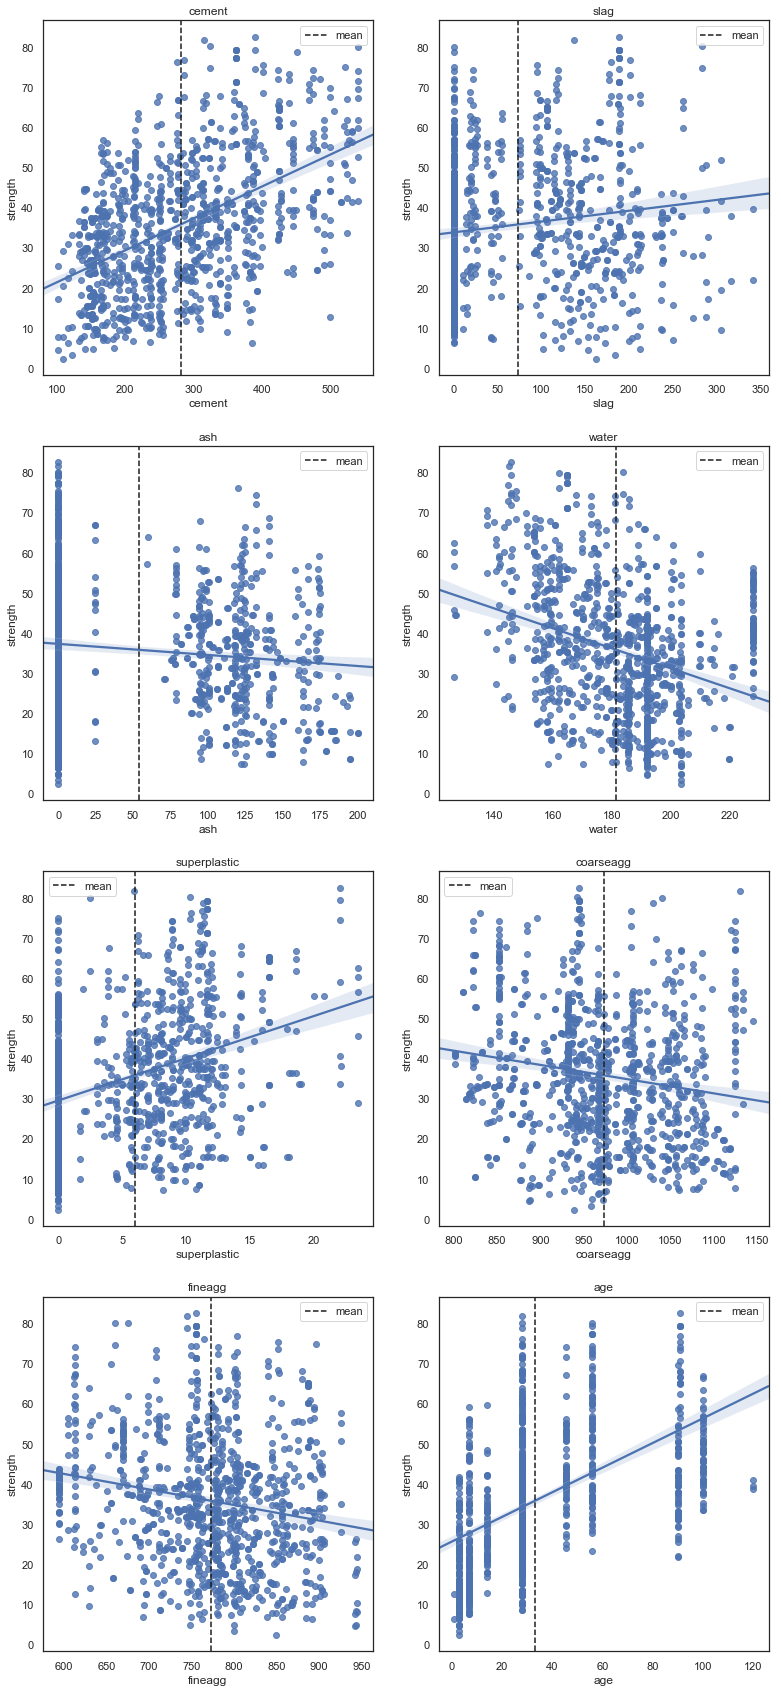

In [513]:
cols = [i for i in cData.columns if i not in 'strength']
length = len(cols)
fig = plt.figure(figsize=(13,30))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.regplot(data = cData, x= i, y = 'strength')
    plt.axvline(cData[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i)


* As already noticed, only cement seems to contribute to predicting strength. Some attributes like slag, ash almost has no impact on the target attribute 'strength'. This is evident from almost horizontal regression lines  

****To understand how much each attributes contribute in predicting strength, we will build a simple regression model and observe the co-efficents for each feature.****

In [514]:
# we wil first scale the data
# then split it into train and test data sets.

from scipy.stats import zscore
cData_Scaled=cData.apply(zscore)
cData_Scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727


In [516]:
X = cData_Scaled.drop(['strength'],axis = 1)
y = cData_Scaled[['strength']]

print("shape of independant data: ", X.shape)
print("shape of dependant data: ", y.shape)


shape of independant data:  (1030, 8)
shape of dependant data:  (1030, 1)


In [517]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

print("Shape of X train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)

Shape of X train :  (721, 8)
Shape of X_test  :  (309, 8)


In [518]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.6379589523070744
The coefficient for slag is 0.3834353717680168
The coefficient for ash is 0.18067977661085505
The coefficient for water is -0.20023757372460368
The coefficient for superplastic is 0.08427194438576095
The coefficient for coarseagg is -0.01500915639244983
The coefficient for fineagg is -0.0538765399905299
The coefficient for age is 0.5292219261126592


* We notice some attributes like superplastic, coarseagg, fineagg has very weak co-efficents.
* So, lets try out regularization models like Ridge and lasso and note down their co-efficents

In [519]:
ridge = Ridge(alpha=.5)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.6345244   0.38020795  0.17787473 -0.20190181  0.08452094 -0.01689475
  -0.05635727  0.52886477]]


In [520]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.4281619   0.16080684  0.         -0.05122895  0.17632306 -0.
 -0.          0.42264183]


**Notice Lasso has driven some co-eeficents to zero (ie) These features can be dropped.  
Features to drop are : ash, coarseagg**

**Lets check for model score to see if a simple linear model is sufficent or we need more complex model**

In [521]:
# Nested Dictionary
scores = { 
'Regression' : {
    'Train score' : regression_model.score(X_train, y_train),
    'Test score': regression_model.score(X_test, y_test),
     },
'Ridge' : {
    'Train score' : ridge.score(X_train, y_train),
    'Test score': ridge.score(X_test, y_test),
    },
'Lasso' : {
    'Train score' : lasso.score(X_train, y_train),
    'Test score': lasso.score(X_test, y_test),
    }
}
scores_df = pd.DataFrame(scores)

scores_df

,Regression,Ridge,Lasso
Test score,0.751949,0.751901,0.660514
Train score,0.735229,0.735227,0.664794


* The model is performing more or less the same for simple linear regressor and for ridge on both the train and test sets.  
* Notice, for lasso, the model score is slighly less as it has acheived the same by using 2 less features.  

**So lets try to increase the model complexity and see if we can increase the model performance.**

In [522]:
from sklearn.preprocessing import PolynomialFeatures

# lets start with a quadratic ie, degree=2
poly = PolynomialFeatures(degree = 2, interaction_only=True)

# then with degree=3
#poly = PolynomialFeatures(degree = 3, interaction_only=True)

X_poly = poly.fit_transform(X)
XP_train, XP_test, yP_train, yP_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
XP_train.shape

(721, 37)

In [523]:
regression_model.fit(XP_train, yP_train)
print(regression_model.coef_[0])

[ 9.78393038e-18  7.10496388e-01  4.73613540e-01  1.63013107e-01
 -2.05673995e-01  1.26783199e-01  2.49962898e-03  2.58788022e-02
  5.44522404e-01  7.97591266e-02  6.10884470e-02 -1.57455994e-01
 -1.65755741e-01  8.42803704e-02  4.86661955e-02  5.94066686e-02
  8.08447624e-02 -6.64381720e-02 -5.86809727e-02  8.85762625e-02
  1.15348955e-01  1.13783206e-01 -2.38787967e-01 -2.58233698e-01
  1.19527016e-02  2.33229526e-02  8.14727385e-02  7.06884483e-02
 -1.37975914e-01 -2.65000348e-02 -2.39922807e-02 -4.53517982e-02
 -1.00353390e-02 -9.13944133e-03  1.10830570e-01 -1.16778985e-03
 -6.54503742e-03]


In [524]:
ridge.fit(XP_train,yP_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.7029405   0.4655632   0.15727171 -0.21040441  0.12655601
  -0.0018716   0.0198573   0.54452125  0.07780747  0.06006749 -0.15418861
  -0.15979152  0.0835854   0.04824185  0.05715543  0.07891335 -0.06427487
  -0.05350976  0.08742269  0.11442925  0.1117241  -0.23439193 -0.25311343
   0.01191437  0.02387389  0.0793984   0.07275507 -0.13649227 -0.02582364
  -0.02512294 -0.04249517 -0.00647502 -0.00898529  0.11022617 -0.00210297
  -0.00825156]]


In [525]:
lasso.fit(XP_train,yP_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.43982948  0.15033704  0.         -0.08963962  0.15275328
 -0.         -0.          0.42104914  0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.03361561
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.        ]


In [526]:
print("Ridge Scores: ")
print("train score : ", ridge.score(XP_train, yP_train))
print("test score : ", ridge.score(XP_test, yP_test))
print()
print("Lasso Scores:")
print("train score : ", lasso.score(XP_train, yP_train))
print("test score : ", lasso.score(XP_test, yP_test))

Ridge Scores: 
train score :  0.7995691366579784
test score :  0.7732835073246457

Lasso Scores:
train score :  0.6833404626042316
test score :  0.6494192072697968


**We notice perfomance of the model slightly increased when compared to linear model**  
**So a quadratic model will be of better use for us then a simple linear model**

**The low score may be due to the large spread and apparent mix of gaussians** 
**Let us explore the data for hidden clusters** 

### b.  Explore for individual clusters and see if model can be build but seperating clusters

In [527]:
#KMeans Clustering
#from distribution we noticed a max of 3 clusters for most of the varibles. Hence let us try in range 1 - 6
from sklearn.cluster import KMeans

cluster_range = range(1, 6)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cData_Scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7568.409562
2,3,6366.039868
3,4,5584.117993
4,5,5101.138551


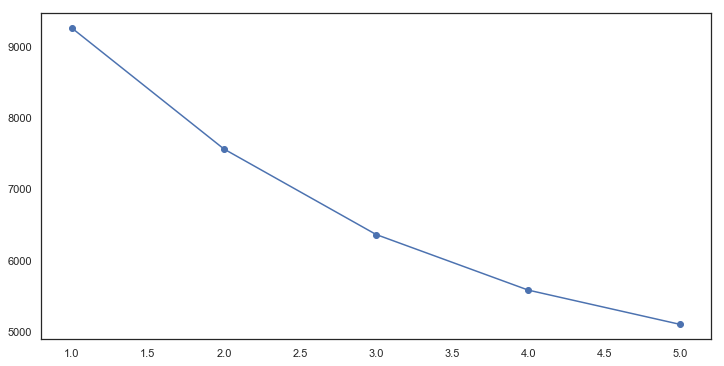

In [528]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

* The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
* Let us consider 3 clusters

In [529]:
cluster = KMeans(n_clusters = 3,random_state=1)
cluster.fit(cData_Scaled)

prediction=cluster.predict(cData_Scaled)

# Creating a mirror copy for later re-use instead of building repeatedly
cData_Scaled_copy = cData_Scaled.copy(deep = True)

# Creating a new column "GROUP" which will hold the cluster id of each record
cData_Scaled_copy["GROUP"] = prediction     

  
cData_Scaled_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,GROUP
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018,2
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108,0
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144,0
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806,2
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727,2


In [530]:
centroids = cluster.cluster_centers_
centroids

centroid_df = pd.DataFrame(centroids, columns = list(cData_Scaled) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.629332,-0.400276,1.126135,-0.266806,0.490642,0.087756,0.235170,0.062458,-0.242541
1,0.955503,0.506622,-0.407968,-0.891693,0.959384,-0.653712,0.060397,-0.008460,1.118429
2,0.073411,0.099393,-0.809908,0.707039,-0.945569,0.261048,-0.245020,-0.052304,-0.362723


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFC1D79668>,
      dtype=object)

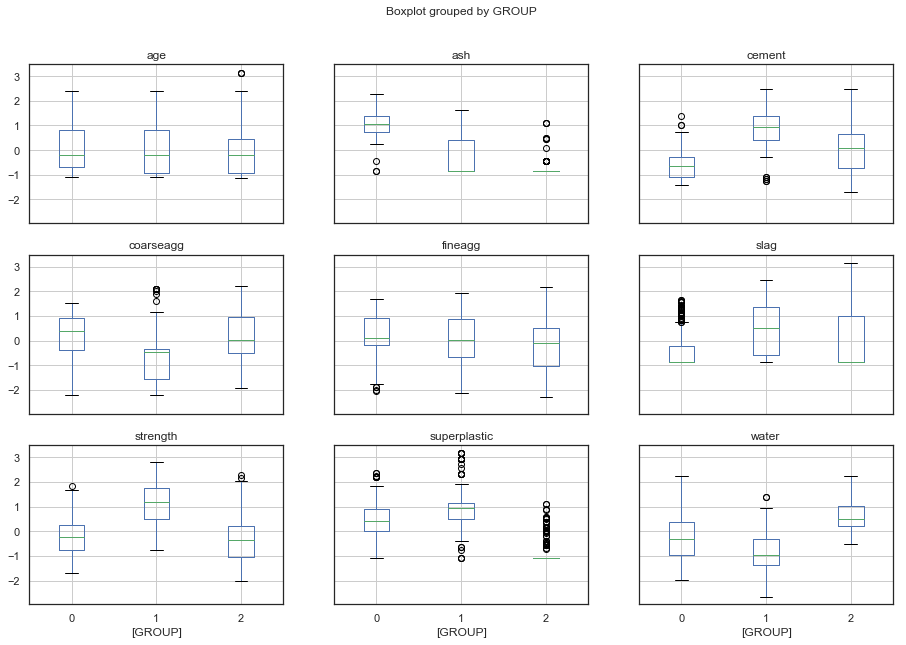

In [531]:
cData_Scaled_copy.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

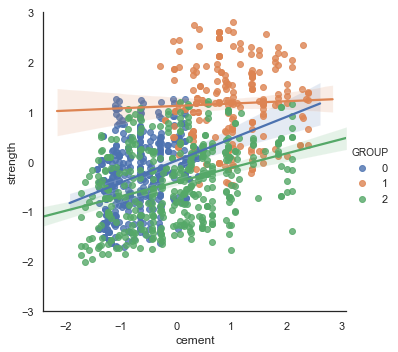

In [532]:
# Let us analyse strength vs each of the other independant column

#cement vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('cement','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

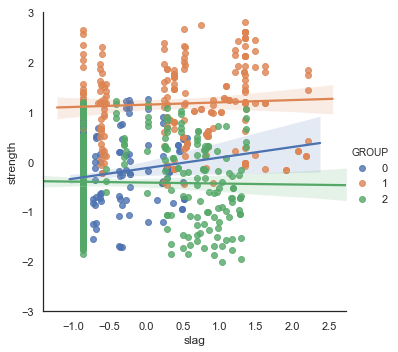

In [533]:
#slag vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('slag','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

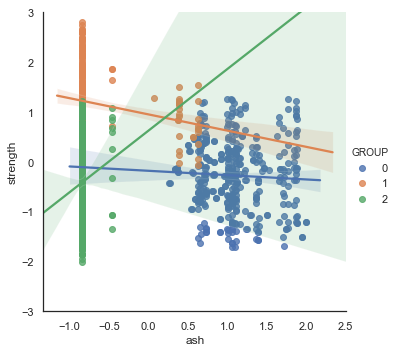

In [534]:
#ash vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('ash','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

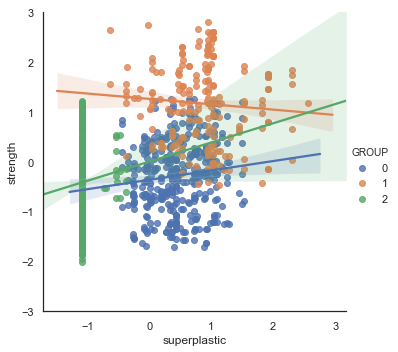

In [535]:
#superplastic vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('superplastic','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

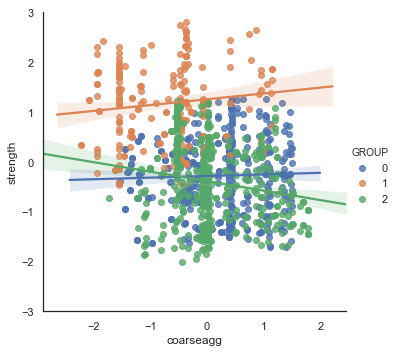

In [536]:
#coarseagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('coarseagg','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

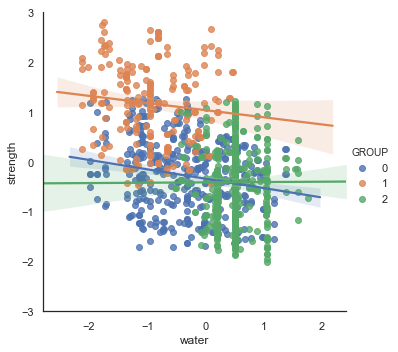

In [537]:
#water vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('water','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

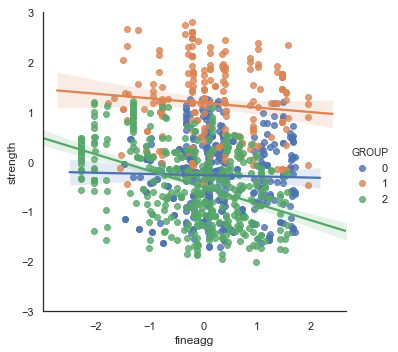

In [538]:
#fineagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('fineagg','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

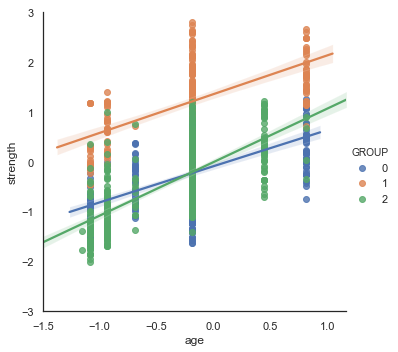

In [539]:
#age vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('age','strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

#### Deductions:

* We notice from the box plots, the body of box for each group overlaps with other. The same can be seen in individual lm plot as well.  
* This means, we are unable to distinguish the clusters clearly. So it is difficult for us to pull out a cluster and build a model on that
* Hence K-means also does not seem to help our cause. 

**What have we understood so far from the analysis?**
1. Kmeans clustering does not help in this case.
2. Attributes like 'ash', 'coarseagg', 'fineagg' are weak contributes so can be dropped.
3. A complex model performs better for the given dataset rather than a linear model
4. The complexity of model can be set as a quadratic. ie degree = 2 polynomial.
5. So we will use a svm regressor with kernel = poly , degree = 2


**Before proceeding to drop the features, lets us validate from feature importance using decision trees.**

## 6.  Obtain feature importance for each model and decide on suitable model

### a. Decision Tree Regressor

In [540]:
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

##### Feature Importance 

In [541]:
col = cData.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([DT_model.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.362211
7,age,0.357255
3,water,0.101358
1,slag,0.088681
4,superplastic,0.028141
6,fineagg,0.025741
5,coarseagg,0.020660
2,ash,0.015953


**This validates our previous assumptions to drop 'ash', 'coarseagg', 'fineagg'**

In [542]:
cData_Scaled_new = cData_Scaled.copy()

X = cData_Scaled_new.drop(['strength','ash','coarseagg','fineagg'] , axis=1)
y = cData_Scaled_new['strength']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(721, 5)
(309, 5)


In [543]:
DT_model_1 = DecisionTreeRegressor()
DT_model_1.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [544]:
col1 = X.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col1]).T, np.array([DT_model_1.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.378373
4,age,0.338670
2,water,0.143059
1,slag,0.108551
3,superplastic,0.031348


In [545]:
y_predict = DT_model_1.predict(X_test)

train_score = DT_model_1.score(X_train,y_train)
test_score = DT_model_1.score(X_test, y_test)

print("Decision tree score for train set: ", train_score*100)
print("Decision tree score for test set: ", test_score*100)

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision tree'], 'accuracy':test_score })
resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

Decision tree score for train set:  99.42618292326911
Decision tree score for test set:  84.96479048728753


,Method,accuracy
0,Decision tree,0.849648


**Notice the difference between Train and Test scores.**  
**This indicated the model is overfitting**

**Lets try Kfold cross validation before pruning the decision tree**

In [546]:
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score


num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(DT_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['DecisionTree k-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.8672468612669526
Standard Deviation:  0.038485070818957315


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247


##### Pruning the decision tree

In [547]:
DT_pruned = DecisionTreeRegressor(criterion = "mse", max_depth=5, min_samples_leaf=5)
DT_pruned.fit(X_train, y_train)

print("Train score : ", DT_pruned.score(X_train,y_train))

Train score :  0.79737125071032


In [548]:
y_predict_1 = DT_pruned.predict(X_test)

# performance on test data
print('Pruned decision tree test score:',DT_pruned.score(X_test,y_test))
accuracy = DT_pruned.score(X_test,y_test)
tempResultsDf = pd.DataFrame({'Method':['DecisionTree pruned'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Pruned decision tree test score: 0.7552219199470561


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222


In [549]:
feature_importance=pd.DataFrame(np.hstack((np.array([col1]).T, np.array([DT_pruned.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.384739
4,age,0.371915
2,water,0.133084
1,slag,0.088641
3,superplastic,0.021621


##### K-fold cross validation on above model

In [550]:
num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(DT_pruned,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['DT pruned K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.7458828631181185
Standard Deviation:  0.04696106656882147


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883


**With pruning the overfitting is now reduced. But it has brought down the model performace aswell.**

### b. Random Forest Regressor

In [551]:
from sklearn.ensemble import RandomForestRegressor

X = cData_Scaled.drop(['strength'],axis = 1)
y = cData_Scaled[['strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

print("Shape of X train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)

Shape of X train :  (721, 8)
Shape of X_test  :  (309, 8)


In [552]:
rfcl = RandomForestRegressor(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = rfcl.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495


##### Feature Importance:

In [553]:
col = cData.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([rfcl.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,age,0.351741
0,cement,0.343031
3,water,0.096819
1,slag,0.080359
4,superplastic,0.050688
6,fineagg,0.037540
5,coarseagg,0.027727
2,ash,0.012094


#### Deductions:
* In decision tree, ash, fineagg, coarseagg are weak features.
* In Random forest except age and cement all others are weak features.

##### K-fold cross validation on above model

In [554]:
num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(rfcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Random forest K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9177075652795311
Standard Deviation:  0.0208796647786307


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708


### c. AdaBoosting Regressor

In [555]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor( n_estimators= 500, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

acc_AB = abcl.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['AdaBoosting regressor'], 'accuracy': acc_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159


##### Feature Importance

In [556]:
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([abcl.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.341210
7,age,0.312783
3,water,0.172526
1,slag,0.090225
6,fineagg,0.030096
5,coarseagg,0.025421
4,superplastic,0.022531
2,ash,0.005208


#### Deductions: 
* In decision tree, ash, fineagg, coarseagg are weak features.
* In Random forest except age and cement all others are weak features.
* In AdaBoosting, all features except age, water, cement are considered to be weak contributors.

##### K-fold cross validation on above model

In [557]:
num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(abcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Ada Boosting K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.7791032921929041
Standard Deviation:  0.032226031503457264


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103


### d. Bagging Regressor

In [558]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(n_estimators=500, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

acc_bag = bgcl.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Bagging regressor'], 'accuracy': acc_bag})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103
0,Bagging regressor,0.883345


##### k-fold cross validation on above model

In [559]:
num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(bgcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Bagging K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9121480125589138
Standard Deviation:  0.02310807143965983


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103
0,Bagging regressor,0.883345
0,Bagging K-fold,0.912148


### e. Gradient Boosting Regressor

In [560]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

acc_grad = gbcl.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Gradient boosting regressor'], 'accuracy': acc_grad})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103
0,Bagging regressor,0.883345
0,Bagging K-fold,0.912148


##### Feature Importance

In [561]:
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([gbcl.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,age,0.378535
0,cement,0.318205
3,water,0.093134
1,slag,0.075467
4,superplastic,0.056890
6,fineagg,0.047170
5,coarseagg,0.021528
2,ash,0.009071


#### Deductions: 
* In decision tree, ash, fineagg, coarseagg are weak features.
* In Random forest except age and cement all others are weak features.
* In AdaBoosting, all features except age, water, cement are considered to be weak contributors.
* In gradient boosting except age and cement, all other are weak features as in the case of Random forest.

##### K -fold on above model

In [562]:
num_folds = 10
seed = 15
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(gbcl,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Gradient boosting K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9361230214004073
Standard Deviation:  0.018563213095977606


,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103
0,Bagging regressor,0.883345
0,Bagging K-fold,0.912148


### f. Support vector Regressor

**As part of our earlier analysis, we considered polyminal of degree = 2 as better performing model on this data.**  
**Hence for SVR we consider, kernel = poly and degree = 2**

In [563]:
from sklearn.svm import SVR
svr = SVR(kernel='poly', degree = 2)
svr.fit(X_train, y_train)
print(X_train.head())

       cement      slag       ash     water  superplastic  coarseagg  \
550 -1.581225  1.168152 -0.847144  0.503957     -1.090842  -0.812172   
974 -0.647814 -0.859675  1.876181 -1.088987      1.046382   0.909477   
773  1.137633 -0.859675 -0.847144  0.261131     -1.090842   0.670144   
261  0.276023 -0.859675 -0.847144  0.503957     -1.090842   0.502869   
294 -0.411350  1.001706 -0.847144  0.197996     -1.090842   0.870875   

      fineagg       age  
550  1.517637 -1.083402  
974 -0.007847 -0.188562  
773 -0.349810 -0.940228  
261  0.730741 -0.940228  
294 -0.485832 -0.188562  


In [564]:
acc_svr = svr.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': acc_grad})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.849648
0,DecisionTree k-fold,0.867247
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.745883
0,Random Forest,0.880495
0,Random forest K-fold,0.917708
0,AdaBoosting regressor,0.771159
0,Ada Boosting K-fold,0.779103
0,Bagging regressor,0.883345
0,Bagging K-fold,0.912148


### Deductions: 

##### Model:
* From the above model performance scores,   
  we see that Random Forest, Bagging , Gradient Boosting, SVM regressors are perfoming better than others.

##### Feature Importance:
* In decision tree, ash, fineagg, coarseagg are weak features.
* In Random forest except age and cement all others are weak features.
* In AdaBoosting, all features except age, water, cement are considered to be weak contributors.
* In gradient boosting except age and cement, all other are weak features as in the case of Random forest.


### 7. Model Tuning

We choose 3 models :   
    * Random Forest Regressor  
    * Gradient Boosting Regressor
    * SVM Regressor  
  
Now we will tune these model and select the model that performs the best.   
Note: SVM is already tuned for best param ie. kernel =poly and degree=2. hence we will not tune further.

#### a. Random Forest Regressor. 

In [565]:
#Grid search to tune model parameters for random forest
from sklearn.model_selection import GridSearchCV

RF = RandomForestRegressor(n_estimators = 100)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [566]:
est = [200,210, 220, 250,]
leaf_size = range(1,4)
split_size = [2, 3, 4, 5]

params = dict(n_estimators=est,min_samples_leaf=leaf_size,min_samples_split=split_size)
model = GridSearchCV(RandomForestRegressor(), param_grid=params, verbose=1)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.9min finished


Best Hyper Parameters:
 {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 220}


In [581]:
RF = RandomForestRegressor(n_estimators = 220,min_samples_leaf=1, min_samples_split=2)
RF.fit(X_train, y_train)

pred_RF = RF.predict(X_test)
model_score = RF.score(X_test,y_test)

resultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy':model_score})
resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Random Forest,0.884681


In [568]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(RF, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

CVScores_Df = pd.DataFrame({'Method':['Random Forest'], 'accuracy':results.mean()*100.0, 'std(+/-)':results.std()*100.0})
CVScores_Df = CVScores_Df[['Method', 'accuracy', 'std(+/-)']]
CVScores_Df

[0.79999032 0.93394152 0.7423858  0.81663687 0.93352838 0.79183801
 0.92152046 0.92651933 0.96416118 0.80170379 0.93348099 0.97690927
 0.95890533 0.95757794 0.93349199 0.81851217 0.88189851 0.97345344
 0.92718395 0.94871002 0.94504266 0.87394453 0.96984509 0.72851292
 0.90443945 0.94674539 0.92973977 0.92791862 0.96407192 0.89113131
 0.88924642 0.9554215  0.93749362 0.95920427 0.86803204 0.9385667
 0.90661444 0.90650145 0.89177062 0.90111013 0.91827923 0.91306818
 0.96408133 0.95444515 0.90810512 0.91545378 0.94780458 0.97363604
 0.90855371 0.95629472]
Accuracy: 91.075% (5.831%)


,Method,accuracy,std(+/-)
0,Random Forest,91.074848,5.83085


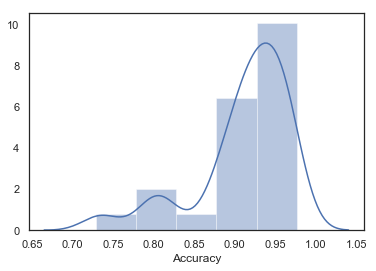

95.0 confidence interval 75.4% and 97.4%


In [569]:
sns.distplot(results,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))


print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### b. Gradient Boosting Regressor

In [570]:
est = [10,150,200,500,1000]
leaf_size = range(1,4)
criterion = ['mse', 'friedman_mse']
split_size = [2, 3, 4]

params = dict(n_estimators=est,min_samples_leaf=leaf_size,min_samples_split=split_size, criterion=criterion)
model = GridSearchCV(GradientBoostingRegressor(), param_grid=params, verbose=1)
model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  1.3min finished


Best Hyper Parameters:
 {'criterion': 'friedman_mse', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}


In [582]:
gbcl = GradientBoostingRegressor(min_samples_leaf=2,min_samples_split=3,n_estimators=1000)
gbcl.fit(X_train,y_train)
print(gbcl.score(X_train,y_train))

acc_grad = gbcl.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Gradient boosting regressor'], 'accuracy': acc_grad})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

0.9904359034370425


,Method,accuracy
0,Random Forest,0.884681
0,Gradient boosting regressor,0.921005


In [572]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(gbcl, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

tempCVScores_Df = pd.DataFrame({'Method':['Gadient Boosting'], 'accuracy':results.mean()*100.0, 'std(+/-)':results.std()*100.0})
CVScores_Df = pd.concat([CVScores_Df, tempCVScores_Df])
CVScores_Df = CVScores_Df[['Method', 'accuracy', 'std(+/-)']]
CVScores_Df

[0.866863   0.97087611 0.8560293  0.95534464 0.88547747 0.89927142
 0.96933479 0.88790907 0.97697167 0.93737577 0.98241815 0.95595913
 0.97552583 0.95222225 0.94954349 0.77512817 0.95298938 0.984905
 0.93998188 0.98220865 0.96643328 0.88703846 0.97760996 0.78121621
 0.88910751 0.96745464 0.94246546 0.93078692 0.98391302 0.94109103
 0.92244425 0.97580398 0.88342309 0.97593419 0.95310907 0.96501418
 0.96512451 0.95484306 0.92059052 0.9257552  0.94487823 0.95724604
 0.98391591 0.96986423 0.94147785 0.93809077 0.94111104 0.94599622
 0.97476484 0.96018847]
Accuracy: 93.846% (4.612%)


,Method,accuracy,std(+/-)
0,Random Forest,91.074848,5.830850
0,Gadient Boosting,93.846055,4.612211


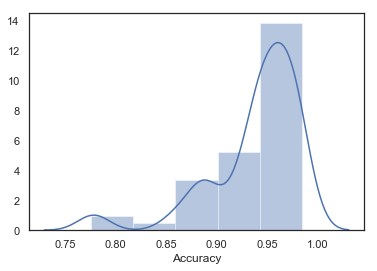

95.0 confidence interval 79.8% and 98.4%


In [573]:
sns.distplot(results,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))


print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [583]:
print("Model scores:")
print(resultsDf)
print()
print("Cross Validation scores: ")
print(CVScores_Df)
print()
print("For Ramdom Forest:  95% Confidence level is: (75.4 - 97.4)%")
print()
print("For Gradient Boosting :  95% Confidence level is: (79.8 - 98.4)%")

Model scores:
                        Method  accuracy
0                Random Forest  0.884681
0  Gradient boosting regressor  0.921005

Cross Validation scores: 
             Method   accuracy  std(+/-)
0     Random Forest  91.074848  5.830850
0  Gadient Boosting  93.846055  4.612211

For Ramdom Forest:  95% Confidence level is: (75.4 - 97.4)%

For Gradient Boosting :  95% Confidence level is: (79.8 - 98.4)%


### Gradient Boosting Regressor is performing best for this dataset with a model score = 92.1% and 95% confidence interval of (79.8 - 98.4)%